In [104]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import re
import numpy as np

sns.set_style("dark")

# IMR 5/75

In [105]:
def sample_nameclean(sample):
    sample = sample.replace("DOX--","Control-")

    sample = sample.replace("DOX-","")
    sample = sample.replace(" 72h","")
    sample = sample.replace("+-","+")

    return sample



In [106]:
histone_data=pd.read_csv("IMR_filtered_ids.csv",index_col="Peptide")
histone_data.columns = [sample_nameclean(sample) for sample in histone_data.columns]

peptide_totals=histone_data.groupby("peptide_id").sum()

In [107]:
len(peptide_totals.columns)

21

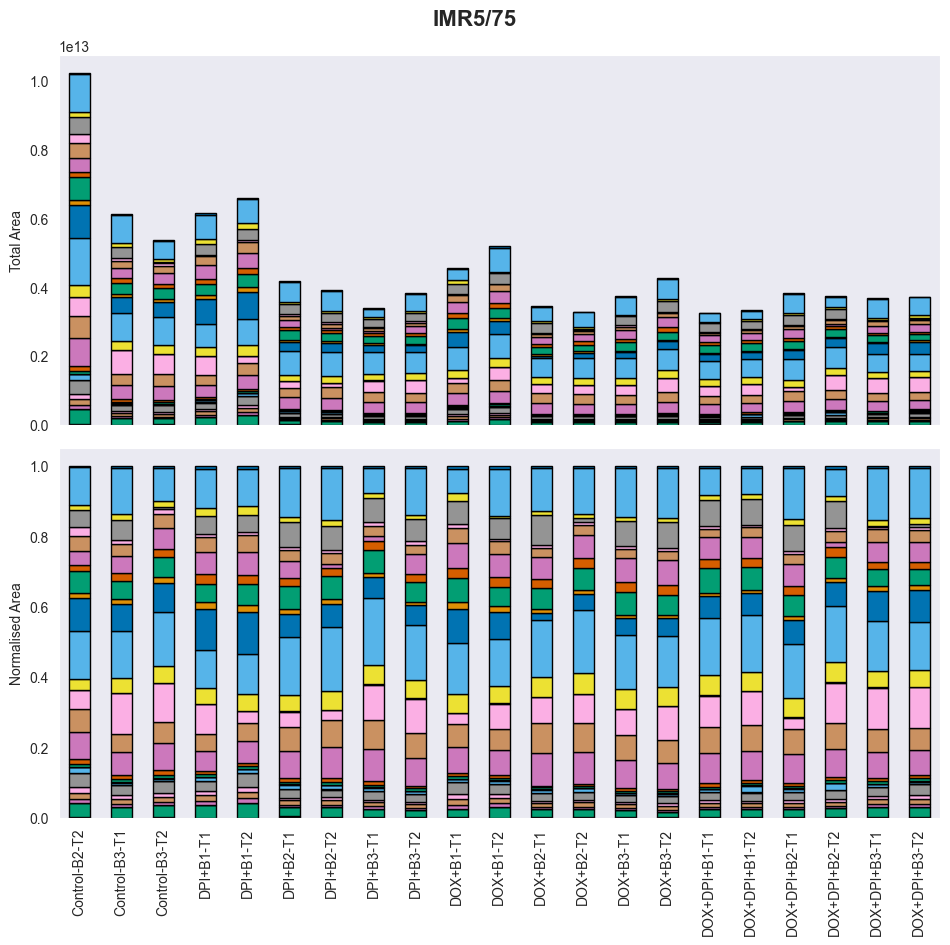

In [108]:
fig, axs= plt.subplots(
    nrows=2,
    figsize=(24/2.5,24/2.5)
)


# Plot the raw intensities
peptide_totals.T.plot(
    kind="bar",stacked=True,
    edgecolor="black",
    color=sns.color_palette("colorblind",len(peptide_totals)),
    ax=axs[0]
)
axs[0].set_xticks([])
axs[0].legend().remove()
axs[0].set_ylabel("Total Area")


# Normalise the peptide totals.
norm = peptide_totals.T.div(
    peptide_totals.T.sum(axis=1),
    axis=0
)
norm.plot(
    kind="bar",stacked=True,
    edgecolor="black",
    color=sns.color_palette("colorblind",len(peptide_totals)),
    ax=axs[1]
)
axs[1].legend(facecolor="black")
handles, labels  = axs[1].get_legend_handles_labels()
axs[1].legend(facecolor="black").remove()
axs[1].set_ylabel("Normalised Area")

fig.suptitle("IMR5/75",fontweight="bold",fontsize=16)
fig.tight_layout()
fig.savefig("IMR5plot.svg")


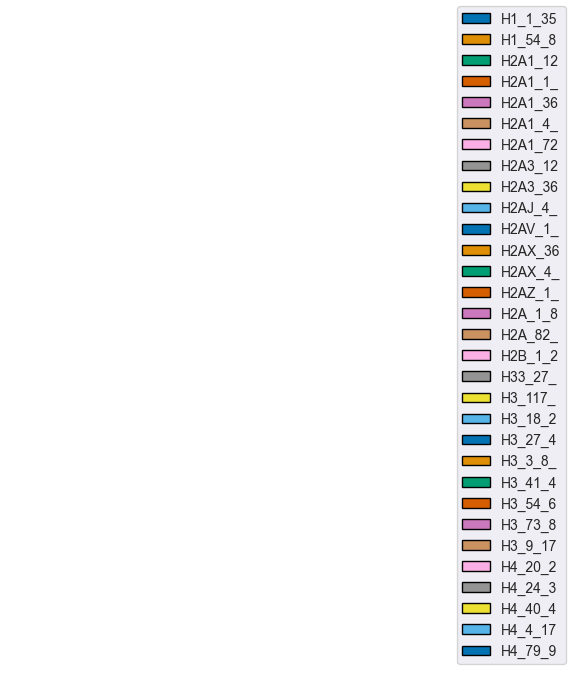

In [109]:
fig_leg = plt.figure()
fig_leg.legend(handles, labels)

plt.tight_layout()
plt.axis('off')
plt.savefig("legend.svg")
plt.show()



# Be2

In [110]:
histone_data=pd.read_csv("Be2_filtered_ids.csv",index_col="Peptide")
histone_data.columns = [sample.replace("NC","Control") for sample in histone_data.columns]

peptide_totals=histone_data.groupby("peptide_id").sum()

In [111]:
len(peptide_totals.columns)

18

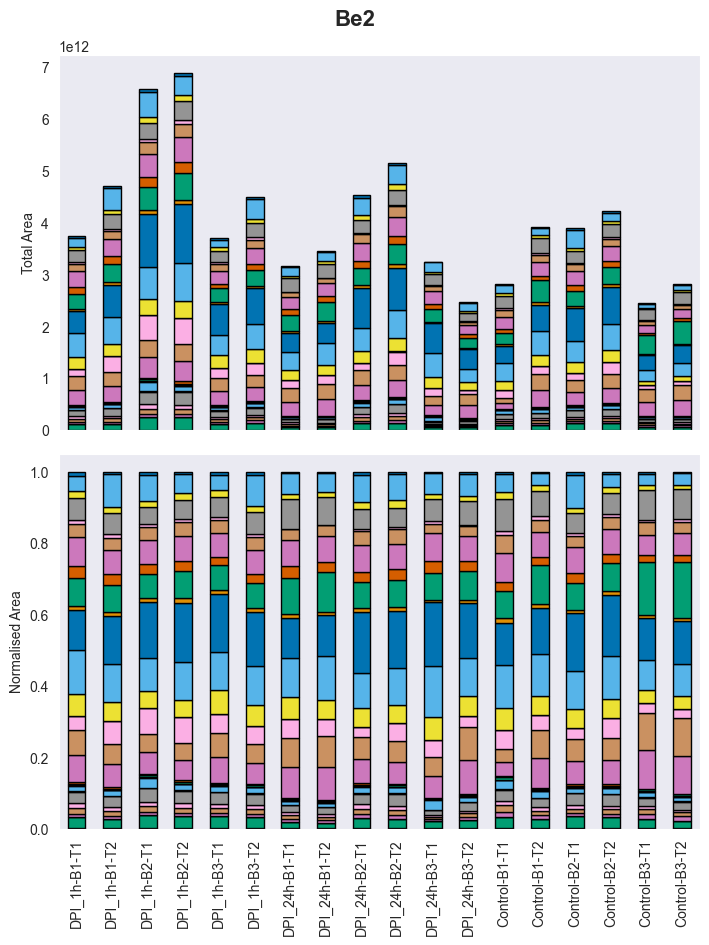

In [112]:
fig, axs= plt.subplots(
    nrows=2,
    figsize=(18/2.5,24/2.5)
)


# Plot the raw intensities
peptide_totals.T.plot(
    kind="bar",stacked=True,
    edgecolor="black",
    color=sns.color_palette("colorblind",len(peptide_totals)),
    ax=axs[0]
)
axs[0].set_xticks([])
axs[0].legend().remove()
axs[0].set_ylabel("Total Area")


# Normalise the peptide totals.
norm = peptide_totals.T.div(
    peptide_totals.T.sum(axis=1),
    axis=0
)
norm.plot(
    kind="bar",stacked=True,
    edgecolor="black",
    color=sns.color_palette("colorblind",len(peptide_totals)),
    ax=axs[1]
)
axs[1].legend(facecolor="black")
handles, labels  = axs[1].get_legend_handles_labels()
axs[1].legend(facecolor="black").remove()
axs[1].set_ylabel("Normalised Area")

fig.suptitle("Be2",fontweight="bold",fontsize=16)
fig.tight_layout()
fig.savefig("Be2plot.svg")

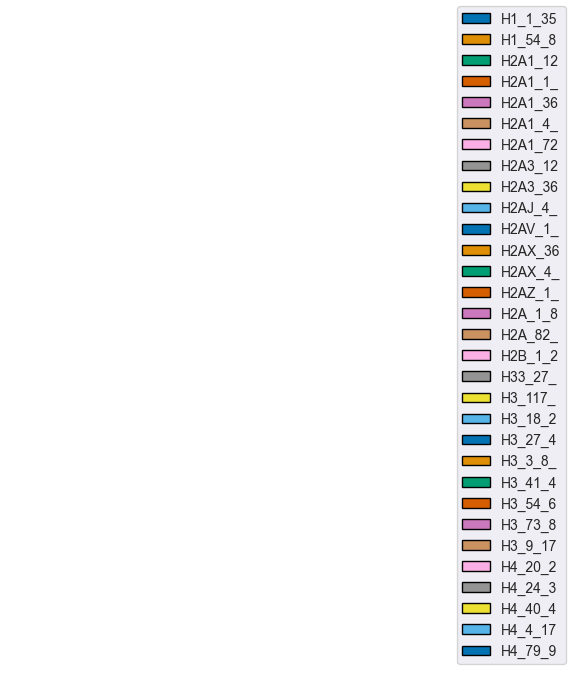

In [113]:
fig_leg = plt.figure()
fig_leg.legend(handles, labels)

plt.tight_layout()
plt.axis('off')
plt.show()